In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('salary_data_cleansed.csv')
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  ...  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private  ...   
1   Baltimore, MD        10000+ employees     1984  Other Organization  ...   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private  ...   
3    Richland, WA  1001 to 5000 employees     1965          Government  ...   
4    New York, NY     51 to 200 employees     1998   Company - Private  ...   

  max_salary avg_salary job_location same_location  \
0         91       72.0           NM             0   
1        112       87.5           MD             0   
2         90       85.0           FL             1   
3         97       76.5           WA             1   
4        143      114.5           NY             1   

                               company_txt  age  python  spark  sql aws  
0                      Tecolote Research\n   47       1      0    0   0  
1  University of Maryland Medical System\n   36       1      0    0   0  
2                                KnowBe4\n   10       1      1    1   0  
3                                   PNNL\n   55       1      0    0   0  
4                     Affinity Solutions\n   22       1      0    1   0  

[5 rows x 27 columns]

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provid_sal', 'min_salary', 'max_salary', 'avg_salary',
       'job_location', 'same_location', 'company_txt', 'age', 'python',
       'spark', 'sql', 'aws'],
      dtype='object')

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

More job opportunities for data scientist and Less for director position roles

In [9]:

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

Lot of opportunities for No Specific seniority levels and very few for Junior level

In [11]:
df['job_location']= df.job_location.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_location.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
UT     10
WI     10
AZ      9
MO      9
AL      8
DE      6
MI      6
GA      6
KY      6
CT      5
IA      5
LA      4
NE      4
OR      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_location, dtype: int64

In [12]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [13]:

#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [15]:

df[df.hourly ==1][['hourly','min_salary','max_salary']]

hourly  min_salary  max_salary
165       1          34          48
177       1          42          68
197       1          36          50
202       1          42          68
210       1          30          50
246       1          34          48
271       1          42          68
337       1          36          50
345       1          48          78
357       1          42          68
363       1          50          56
408       1          42          58
409       1          20          34
492       1          36          50
509       1          48          78
533       1          42          68
542       1          50          56
617       1          42          58
618       1          20          34
645       1          54          94
666       1          36          50
682       1          48          78
711       1          42          68
724       1          50          56

In [16]:

df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [17]:
df.describe()

Rating      Founded      hourly  emp_provid_sal  min_salary  \
count  742.000000   742.000000  742.000000      742.000000  742.000000   
mean     3.618868  1837.154987    0.032345        0.022911   74.719677   
std      0.801210   497.183763    0.177034        0.149721   30.980593   
min     -1.000000    -1.000000    0.000000        0.000000   15.000000   
25%      3.300000  1939.000000    0.000000        0.000000   52.000000   
50%      3.700000  1988.000000    0.000000        0.000000   69.500000   
75%      4.000000  2007.000000    0.000000        0.000000   91.000000   
max      5.000000  2019.000000    1.000000        1.000000  202.000000   

       max_salary  avg_salary  same_location         age      python  \
count  742.000000  742.000000     742.000000  742.000000  742.000000   
mean   128.149596  100.626011       0.557951   46.591644    0.528302   
std     45.220324   38.855948       0.496965   53.778815    0.499535   
min     16.000000   13.500000       0.000000   -1.000000    0.000000   
25%     96.000000   73.500000       0.000000   11.000000    0.000000   
50%    124.000000   97.500000       1.000000   24.000000    1.000000   
75%    155.000000  122.500000       1.000000   59.000000    1.000000   
max    306.000000  254.000000       1.000000  276.000000    1.000000   

            spark         sql         aws      desc_len    num_comp  
count  742.000000  742.000000  742.000000    742.000000  742.000000  
mean     0.225067    0.512129    0.237197   3869.545822    1.053908  
std      0.417908    0.500190    0.425651   1521.495868    1.384239  
min      0.000000    0.000000    0.000000    407.000000    0.000000  
25%      0.000000    0.000000    0.000000   2801.000000    0.000000  
50%      0.000000    1.000000    0.000000   3731.000000    0.000000  
75%      0.000000    1.000000    0.000000   4740.000000    3.000000  
max      1.000000    1.000000    1.000000  10051.000000    4.000000

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provid_sal', 'min_salary', 'max_salary', 'avg_salary',
       'job_location', 'same_location', 'company_txt', 'age', 'python',
       'spark', 'sql', 'aws', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [20]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
emp_provid_sal         int64
min_salary             int64
max_salary             int64
avg_salary           float64
job_location          object
same_location          int64
company_txt           object
age                    int64
python                 int64
spark                  int64
sql                    int64
aws                    int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

# Numerical Features Analysis

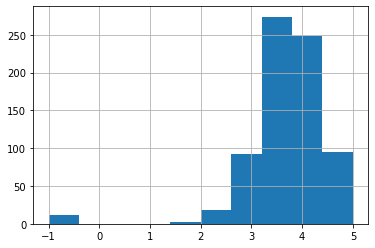

In [19]:
df.Rating.hist()
# Ratings following the almost normal distribution

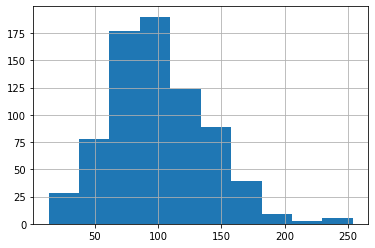

In [22]:
df.avg_salary.hist()
# Average Salary is following the almost normal distribution

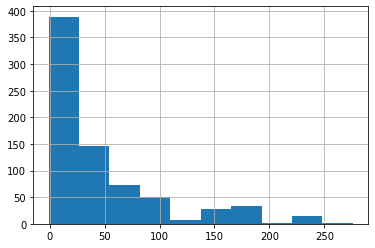

In [25]:
df.age.hist()
# age is following the almost log distribution


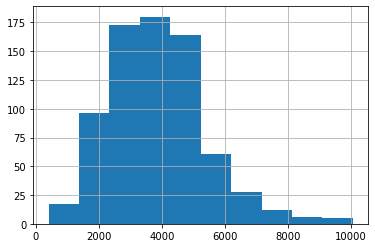

In [28]:
df.desc_len.hist()
# Job Description Length is following the almost normal distribution

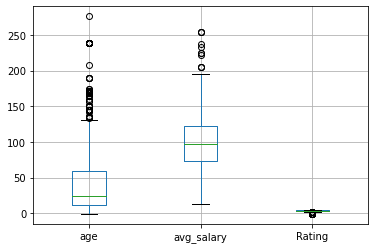

In [29]:
df.boxplot(column = ['age','avg_salary','Rating'])
# there are few outliers of age of the company and average salary

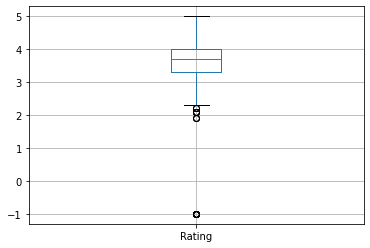

In [31]:
df.boxplot(column = 'Rating')
# Few outliers with age as -1

In [32]:
df[['age','avg_salary','Rating','desc_len']].corr()


age  avg_salary    Rating  desc_len
age         1.000000    0.019655  0.021655  0.163911
avg_salary  0.019655    1.000000  0.013492  0.078808
Rating      0.021655    0.013492  1.000000 -0.012281
desc_len    0.163911    0.078808 -0.012281  1.000000

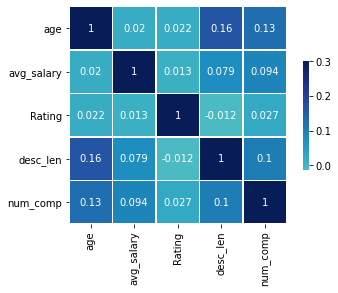

In [36]:

sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap="YlGnBu",
            square=True,annot=True,linewidths=.5, cbar_kws={"shrink": .5})

## age and desc_len are postively co-related
## num_comp and age are postively co-related
# none of the numerical features has much effect on avg_salary

# Categorical Features Analysis

In [39]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
emp_provid_sal         int64
min_salary             int64
max_salary             int64
avg_salary           float64
job_location          object
same_location          int64
company_txt           object
age                    int64
python                 int64
spark                  int64
sql                    int64
aws                    int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [41]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_location','same_location', 'python', 'spark',
       'sql', 'aws',  'job_simp', 'seniority']]

graph for Location: total = 200


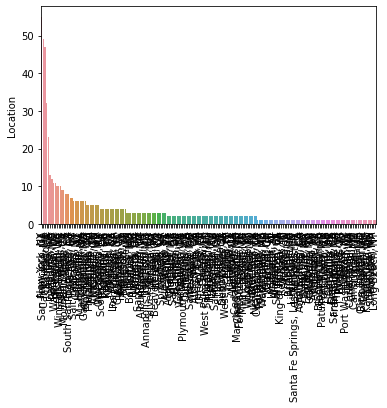

graph for Headquarters: total = 198


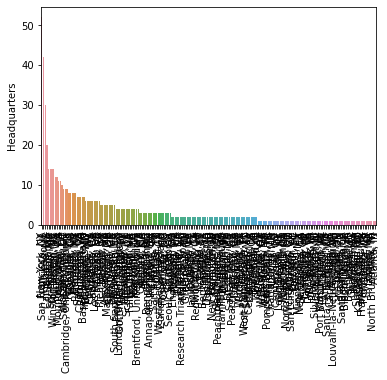

graph for Size: total = 9


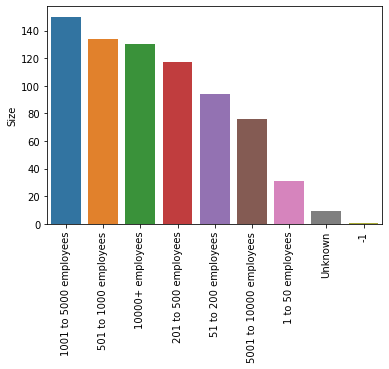

graph for Type of ownership: total = 11


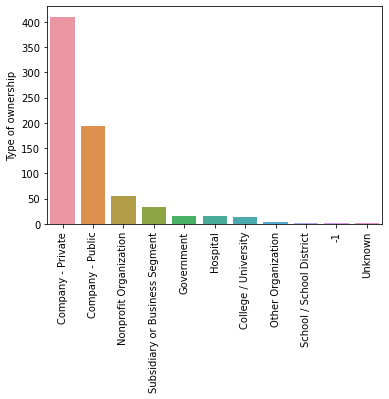

graph for Industry: total = 60


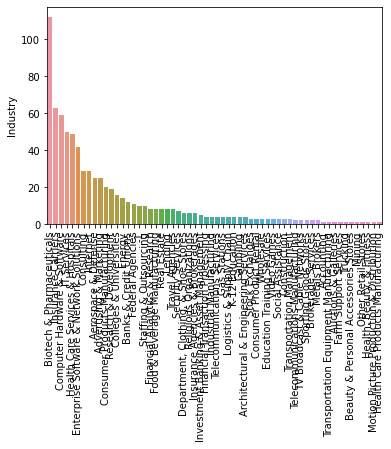

graph for Sector: total = 25


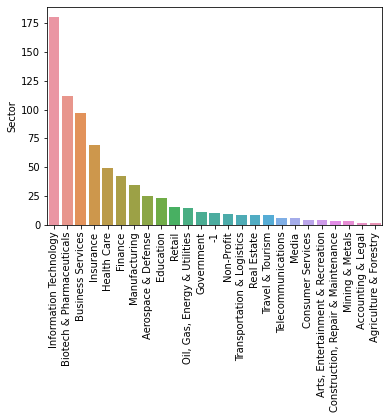

graph for Revenue: total = 14


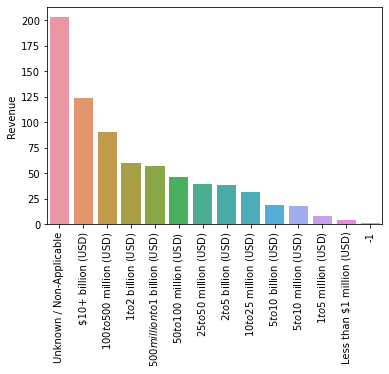

graph for company_txt: total = 343


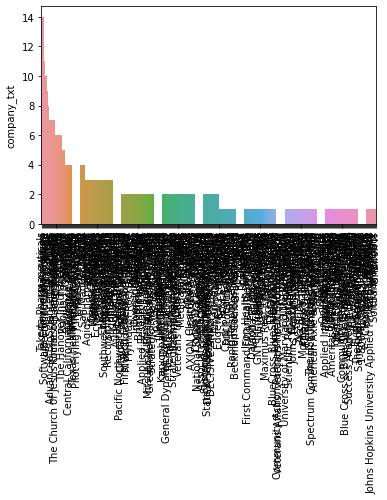

graph for job_location: total = 37


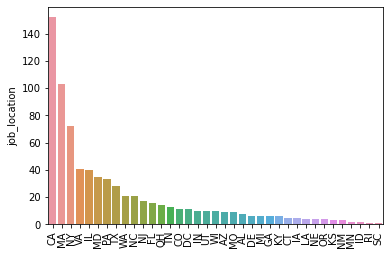

graph for same_location: total = 2


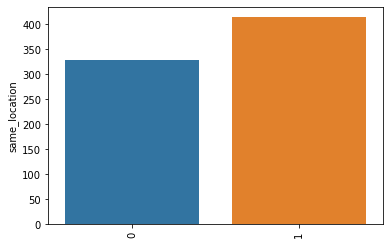

graph for python: total = 2


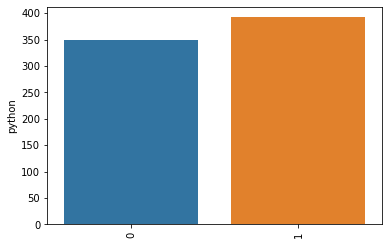

graph for spark: total = 2


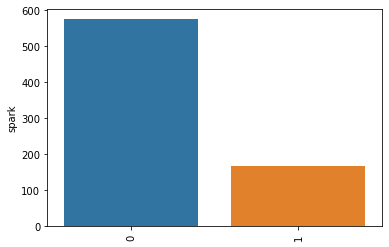

graph for sql: total = 2


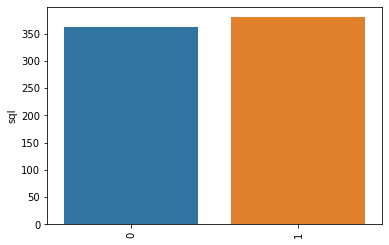

graph for aws: total = 2


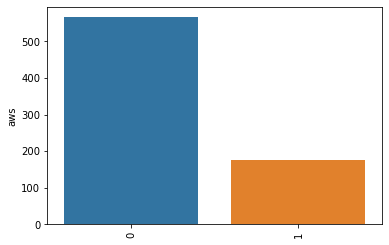

graph for job_simp: total = 7


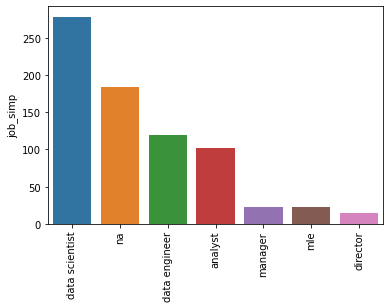

graph for seniority: total = 3


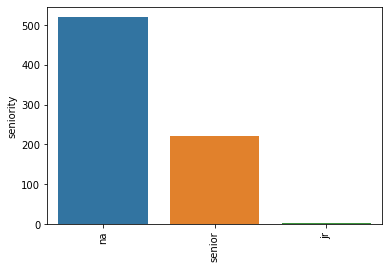

In [42]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Employee strength 500 - 5000 and 10000+ are offering the more jobs

Private companies offering more jobs compare to other ownerships

IT companies are offering more jobs 

Unknown/not given revenue companies offering more jobs and California & Massachusetts  are leading in the stae wise job counts

More opportunities for data scientists than others


graph for Location: total = 20


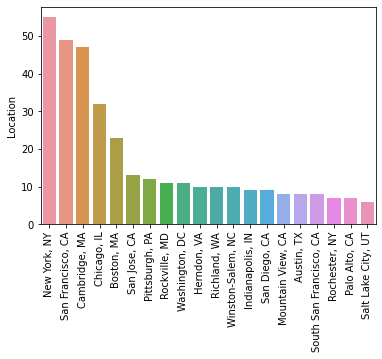

graph for Headquarters: total = 20


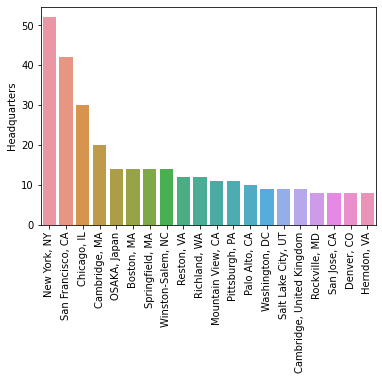

graph for company_txt: total = 20


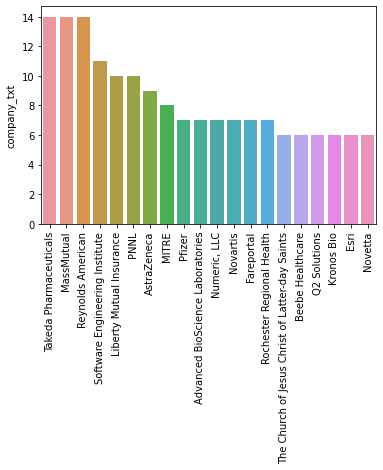

In [43]:

for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    



New York and San Francisco have more job opportunities and more Headquaters are located here

There no popular comapanies names listed in the job opening list(Top 20 list)

Takeda pharmaceutical, MassMutual, Reynolds american offering more jobs then other companies 

In [44]:

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provid_sal', 'min_salary', 'max_salary', 'avg_salary',
       'job_location', 'same_location', 'company_txt', 'age', 'python',
       'spark', 'sql', 'aws', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [46]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')
## Machine Learning Engineers getting paid much and low for Managers 

avg_salary
job_simp                  
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mle             126.431818
na               84.853261

In [48]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')
## Senior getting paid more in every job level and Analysts are getting paid very less

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [49]:

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [52]:
pd.pivot_table(df, index = ['job_location','job_simp'], values = 'avg_salary').sort_values('job_location', ascending = True)

avg_salary
job_location job_simp                  
AL           analyst          62.200000
             data engineer    65.000000
             na               43.750000
AZ           analyst          55.000000
             data engineer    79.500000
             data scientist   69.500000
             na              124.500000
CA           mle             177.300000
             manager          80.611111
             na               99.907407
             data engineer   129.540000
             analyst          85.250000
             data scientist  142.522059
CO           analyst          29.500000
             data engineer    99.000000
             data scientist  108.666667
             mle             100.500000
             na               31.500000
CT           data scientist   84.000000
             na               62.500000
DC           analyst          63.500000
             data engineer    85.000000
             data scientist  149.000000
DE           na               27.500000
FL           data engineer    91.833333
             data scientist   97.357143
             analyst          47.500000
GA           data scientist   81.333333
             na               80.000000
IA           analyst          43.000000
             data engineer   102.833333
ID           analyst          56.250000
IL           na               57.166667
             analyst          66.500000
             data engineer    96.125000
             data scientist  117.233333
             director        221.750000
             mle             133.000000
IN           na               69.000000
             data scientist   84.500000
             data engineer   114.500000
KS           mle              87.000000
KY           data scientist   84.000000
             na              103.500000
LA           analyst          48.000000
             data engineer    70.500000
             na               20.000000
MA           manager          71.900000
             director        117.833333
             na              107.478261
             data engineer   107.291667
             analyst          59.125000
             data scientist  113.750000
MD           data scientist  109.115385
             na               88.750000
             analyst          80.666667
             data engineer   109.000000
MI           data scientist  106.625000
             manager          87.500000
MN           analyst          76.000000
             data engineer    95.000000
MO           analyst          61.000000
             data scientist  127.666667
             manager          40.500000
             na               72.333333
NC           data engineer   104.250000
             data scientist  117.000000
             na               90.916667
NE           na               41.000000
NJ           na               82.500000
             manager         109.500000
             director        161.500000
             data engineer   112.000000
             data scientist  106.875000
             analyst          83.583333
NM           data scientist   74.333333
NY           analyst          65.607143
             data engineer    86.375000
             data scientist  115.250000
             mle             125.000000
             na               81.583333
OH           na               91.166667
             analyst          53.875000
             data scientist  105.285714
OR           data scientist   98.500000
             data engineer    73.000000
PA           analyst          62.750000
             data engineer    91.500000
             data scientist  113.333333
             manager         109.666667
             mle             120.500000
             na               76.062500
RI           analyst         100.000000
SC           na               60.500000
TN           analyst          13.500000
             data engineer   100.950000
             data scientist   96.000000
TX           data scientist  100.730769
             na              

In [53]:
pd.pivot_table(df, index = ['job_location','job_simp'], values = 'avg_salary',aggfunc ='count').sort_values('job_location', ascending = True)

## most jobs are from CA in all profiles

avg_salary
job_location job_simp                  
AL           analyst                  5
             data engineer            1
             na                       2
AZ           analyst                  1
             data engineer            5
             data scientist           1
             na                       2
CA           mle                      5
             manager                  9
             na                      27
             data engineer           25
             analyst                 18
             data scientist          68
CO           analyst                  1
             data engineer            3
             data scientist           3
             mle                      1
             na                       3
CT           data scientist           2
             na                       3
DC           analyst                  2
             data engineer            4
             data scientist           5
DE           na                       6
FL           data engineer            3
             data scientist           7
             analyst                  6
GA           data scientist           3
             na                       3
IA           analyst                  2
             data engineer            3
ID           analyst                  2
IL           na                       6
             analyst                  3
             data engineer            8
             data scientist          15
             director                 6
             mle                      2
IN           na                       4
             data scientist           2
             data engineer            4
KS           mle                      3
KY           data scientist           2
             na                       4
LA           analyst                  1
             data engineer            2
             na                       1
MA           manager                  5
             director                 6
             na                      46
             data engineer           12
             analyst                  4
             data scientist          30
MD           data scientist          13
             na                      16
             analyst                  3
             data engineer            3
MI           data scientist           4
             manager                  2
MN           analyst                  1
             data engineer            1
MO           analyst                  2
             data scientist           3
             manager                  1
             na                       3
NC           data engineer            6
             data scientist           3
             na                      12
NE           na                       4
NJ           na                       1
             manager                  2
             director                 2
             data engineer            2
             data scientist           4
             analyst                  6
NM           data scientist           3
NY           analyst                 14
             data engineer            4
             data scientist          40
             mle                      2
             na                      12
OH           na                       3
             analyst                  4
             data scientist           7
OR           data scientist           3
             data engineer            1
PA           analyst                  8
             data engineer            1
             data scientist           6
             manager                  3
             mle                      7
             na                       8
RI           analyst                  1
SC           na                       1
TN           analyst                  2
             data engineer           10
             data scientist           1
TX           data scientist          13
             na              

In [56]:

pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_location', values = 'avg_salary').sort_values('avg_salary', ascending = False)
## Washington, California and Utah paying high for Data Scientists

avg_salary
job_location            
DC            149.000000
CA            142.522059
UT            140.500000
MO            127.666667
IL            117.233333
NC            117.000000
NY            115.250000
MA            113.750000
WI            113.500000
PA            113.333333
MD            109.115385
CO            108.666667
VA            108.416667
NJ            106.875000
MI            106.625000
OH            105.285714
TX            100.730769
WA             99.764706
OR             98.500000
FL             97.357143
TN             96.000000
IN             84.500000
KY             84.000000
CT             84.000000
GA             81.333333
NM             74.333333
AZ             69.500000

In [58]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [60]:

pd.pivot_table(df[df.job_simp == 'mle'], index = 'job_location', values = 'avg_salary').sort_values('avg_salary', ascending = False)
##California  paying very high for Machine Learning Engineers

avg_salary
job_location            
CA                 177.3
IL                 133.0
NY                 125.0
PA                 120.5
CO                 100.5
KS                  87.0
VA                  87.0

In [62]:

pd.pivot_table(df[df.job_simp == 'data engineer'], index = 'job_location', values = 'avg_salary').sort_values('avg_salary', ascending = False)
##California, Chicago  paying high for data engineer

avg_salary
job_location            
CA            129.540000
IN            114.500000
TX            113.062500
NJ            112.000000
MD            109.000000
MA            107.291667
NC            104.250000
IA            102.833333
TN            100.950000
UT            100.333333
CO             99.000000
VA             96.900000
IL             96.125000
MN             95.000000
FL             91.833333
PA             91.500000
NY             86.375000
DC             85.000000
AZ             79.500000
OR             73.000000
LA             70.500000
AL             65.000000

In [63]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provid_sal', 'min_salary', 'max_salary', 'avg_salary',
       'job_location', 'same_location', 'company_txt', 'age', 'python',
       'spark', 'sql', 'aws', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [65]:

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'emp_provid_sal', 'python', 'sql', 'spark', 'aws',  'Type of ownership','avg_salary']]

In [66]:

for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [67]:

pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python                               0      1
Revenue                                      
$1 to $2 billion (USD)            16.0   44.0
$1 to $5 million (USD)             1.0    7.0
$10 to $25 million (USD)          16.0   16.0
$10+ billion (USD)                66.0   58.0
$100 to $500 million (USD)        47.0   44.0
$2 to $5 billion (USD)            17.0   22.0
$25 to $50 million (USD)          24.0   16.0
$5 to $10 billion (USD)            9.0   10.0
$5 to $10 million (USD)            9.0    9.0
$50 to $100 million (USD)         21.0   25.0
$500 million to $1 billion (USD)  29.0   28.0
-1                                 1.0    NaN
Less than $1 million (USD)         1.0    3.0
Unknown / Non-Applicable          93.0  110.0

In [71]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


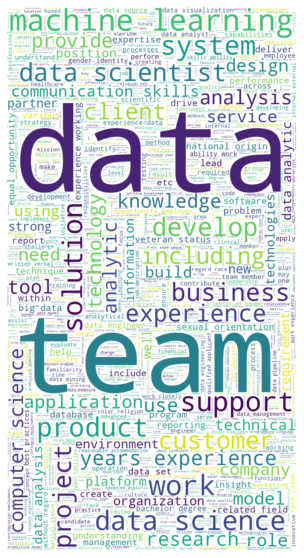

<Figure size 432x288 with 0 Axes>

In [75]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig('Salary Estimator Word Cloud.png')